# Quick Recommender EDA
---

In [1]:
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
ratings = pd.read_csv('./data/veggie_ratings.csv')
ratings.head()

,Timestamp,Artichokes,Arugula,Asparagus,Bush beans (green beans),Pole beans(green beans),Beets,Bok Choy,Broccoli,Brussel Sprouts,Cabbage,Carrots,Cauliflower,Celery,Chives,Collards,Corn,Cucumbers,Eggplant,Garlic,Kale,Leeks,Lettuce,Mustard Greens,Onions,Parsnips,Peas,Peppers,Potatoes,Pumpkin,Radishes,Rhubarb,Rutabaga,Shallots,Spinach,Summer Squash,Winter Squash,Swiss Chard,Tomatoes,Turnips
0,10/12/2021 17:47:21,5,5,5,4,4,1,3,5,5,5,5,5,2,4,3,4,2,2,5,5,4,5,3,5,3,5,5,5,3,1,2,2,4,5,1,1,3,5,2
1,10/12/2021 17:57:50,2,4,2,4,2,1,1,3,1,1,5,5,5,5,1,5,4,1,5,4,1,5,1,4,1,1,5,3,1,1,1,1,3,5,1,1,1,4,1
2,10/12/2021 18:17:26,3,3,5,3,3,1,1,4,3,2,3,1,3,4,1,5,1,4,5,1,1,4,1,5,1,4,5,5,2,1,2,1,5,5,1,1,1,4,1
3,10/12/2021 18:18:15,4,2,1,2,2,2,3,3,3,2,5,4,2,3,2,5,1,2,5,2,2,2,2,2,2,2,3,5,2,3,2,2,2,2,2,2,2,1,2
4,10/12/2021 18:21:26,3,2,5,5,5,1,1,5,1,1,5,3,4,1,1,5,5,2,5,1,1,5,1,1,1,4,1,5,4,1,1,1,1,1,1,1,1,5,1


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Timestamp                 134 non-null    object
 1   Artichokes                134 non-null    int64 
 2   Arugula                   134 non-null    int64 
 3   Asparagus                 134 non-null    int64 
 4   Bush beans (green beans)  134 non-null    int64 
 5   Pole beans(green beans)   134 non-null    int64 
 6   Beets                     134 non-null    int64 
 7   Bok Choy                  134 non-null    int64 
 8   Broccoli                  134 non-null    int64 
 9   Brussel Sprouts           134 non-null    int64 
 10  Cabbage                   134 non-null    int64 
 11  Carrots                   134 non-null    int64 
 12  Cauliflower               134 non-null    int64 
 13  Celery                    134 non-null    int64 
 14  Chives                    

In [4]:
ratings.describe()

,Artichokes,Arugula,Asparagus,Bush beans (green beans),Pole beans(green beans),Beets,Bok Choy,Broccoli,Brussel Sprouts,Cabbage,Carrots,Cauliflower,Celery,Chives,Collards,Corn,Cucumbers,Eggplant,Garlic,Kale,Leeks,Lettuce,Mustard Greens,Onions,Parsnips,Peas,Peppers,Potatoes,Pumpkin,Radishes,Rhubarb,Rutabaga,Shallots,Spinach,Summer Squash,Winter Squash,Swiss Chard,Tomatoes,Turnips
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,3.052239,3.261194,4.029851,3.902985,3.828358,2.358209,2.723881,4.238806,3.649254,3.343284,4.134328,3.619403,3.111940,3.731343,2.708955,4.246269,3.791045,2.970149,4.611940,3.052239,2.805970,4.126866,2.320896,4.283582,2.402985,3.320896,4.350746,4.731343,3.425373,2.604478,2.238806,1.858209,3.567164,4.208955,3.507463,3.298507,2.283582,4.134328,2.276119
std,1.333869,1.297361,1.175823,1.109558,1.166745,1.463352,1.367682,1.056161,1.477945,1.189582,1.081568,1.308128,1.374638,1.227285,1.407951,1.086047,1.349322,1.381621,0.764931,1.276256,1.362647,1.006906,1.217669,1.121304,1.263242,1.459224,1.035153,0.627253,1.299953,1.309414,1.245619,0.982195,1.416592,1.076576,1.418176,1.461433,1.277991,1.231119,1.282571
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000,3.000000,3.000000,1.000000,1.000000,4.000000,2.250000,2.000000,4.000000,3.000000,2.000000,3.000000,1.000000,4.000000,3.000000,2.000000,4.000000,2.000000,2.000000,4.000000,1.000000,4.000000,1.000000,2.000000,4.000000,5.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,2.250000,2.000000,1.000000,4.000000,1.000000
50%,3.000000,3.000000,4.000000,4.000000,4.000000,2.000000,3.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,5.000000,4.000000,3.000000,5.000000,3.000000,3.000000,4.000000,2.000000,5.000000,2.000000,4.000000,5.000000,5.000000,3.000000,3.000000,2.000000,2.000000,4.000000,5.000000,4.000000,3.500000,2.000000,5.000000,2.000000
75%,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,3.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Text(0.5, 1.0, 'Average Vegetable Ratings')

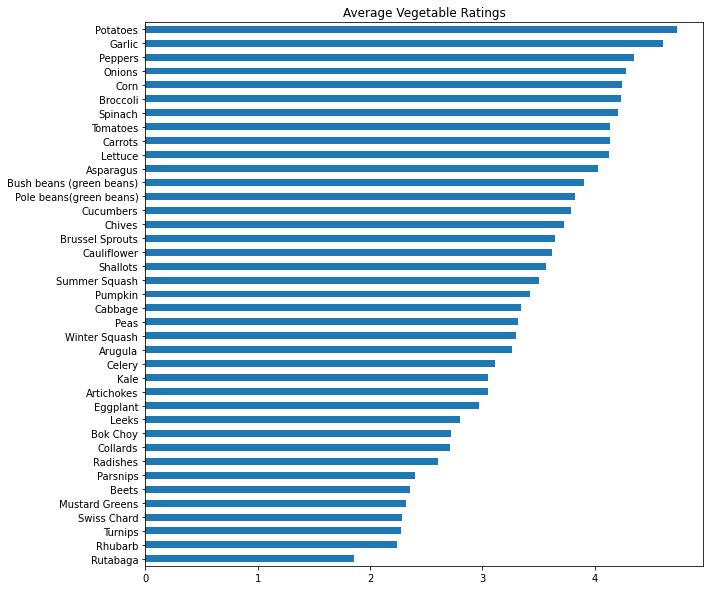

In [5]:
ratings.mean().sort_values().plot(kind='barh', figsize=(10, 10))
plt.title('Average Vegetable Ratings')